# Supervised Learning

## Preprocessing Data for Machine Learning

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
plt.style.use('bmh')

In [162]:
path = r'/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'titanic.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Dictionary
|Variable|	Definition	|Key
|--------|--------|--------|
|survival|	Survival	|0 = No, 1 = Yes
|pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
|sex|	Sex	|
|Age|	Age in years	|
|sibsp|	# of siblings / spouses aboard the Titanic	 |
|parch|	# of parents / children aboard the Titanic	|
|ticket|	Ticket number	|
|fare|	Passenger fare|
|cabin|	Cabin number	|
|embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes
**pclass:** A proxy for socio-economic status (SES)</br>
- 1st = Upper
- 2nd = Middle
- 3rd = Lower 
 
 
**age:** </br>
Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 </br>
- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson </br>
Some children travelled only with a nanny, therefore parch=0 for them.

> Here, the target is "Survived" because we are trying to predict who survived (1) and who didn't (0)
> The objective is to prepare the data for ML models so we can predict whether a passenger survived or not based on the information provided (features) 

## EDA

In [163]:
cat_cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket','Cabin', 'Embarked']
num_cols = ['Age', 'SibSp','Parch', 'Fare']

In [164]:
# check for missing data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [165]:
# checking the ratio of nulls for Cabin
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

- We have Age, Cabin, and Embarked with missing values
- We'll discuss techniques for each in our preprocessing section

Assessment for handling nulls:
- Age: can be imputed because the ratio is above 5%
- Cabin: the column can be dropped because it has a very high ratio of nulls
- Embarked: drop the rows with nulls because the ratio is low

In [166]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- The ratio of survived = the average = 0.384
- The oldest person was 80 and the youngest was 5 months old
- 75% (majority) of the passengers were 38 years old and below 
- Based on 75th percentile most passengers had 1 sibling/spouse at most
- 50% of our population are single travelers 

<Axes: ylabel='Pclass'>

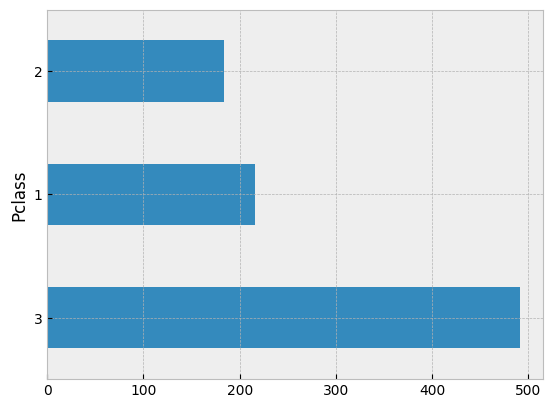

In [167]:
df['Pclass'].value_counts().plot(kind='barh')

- Class 3 is the most common

<Axes: ylabel='SibSp'>

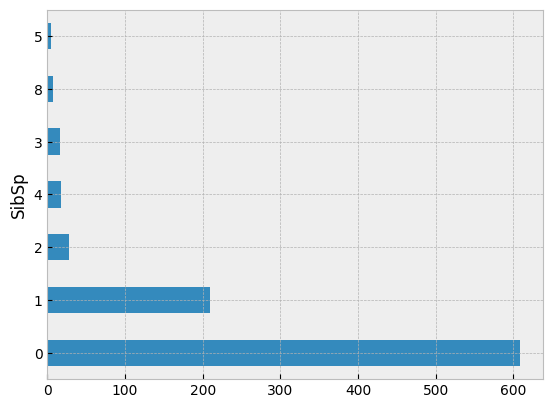

In [168]:
df['SibSp'].value_counts().plot(kind='barh')

<Axes: >

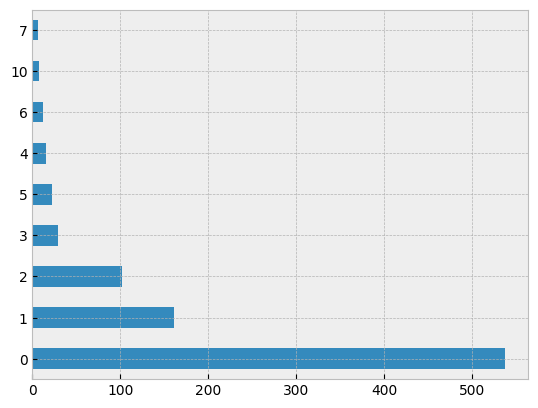

In [169]:
(df['SibSp']+df['Parch']).value_counts().plot(kind='barh')

In [170]:
df['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

### Fare vs Class Comparison

In [171]:
df.groupby('Pclass')[['Fare']].agg(['min', 'max', 'mean', 'median'])

Fare                              
        min       max       mean   median
Pclass                                   
1       0.0  512.3292  84.154687  60.2875
2       0.0   73.5000  20.662183  14.2500
3       0.0   69.5500  13.675550   8.0500

- Min for all classes is zero. Could be staff members
- Max for 1st class is 512 and median is 60. Both are higher than other classes
- However, the median of the 1st class is lower than the max of the 3rd class. could be a rare occasion (people booking 3rd class ticket last minute)
- The gap between avg of 3rd and 2nd classes is smaller than the one between 2nd and 1st classes
- We know that the data is skewed because median is not close to mean. The median is lower than the mean. Therefore, positively skewed.

<Axes: xlabel='Embarked', ylabel='count'>

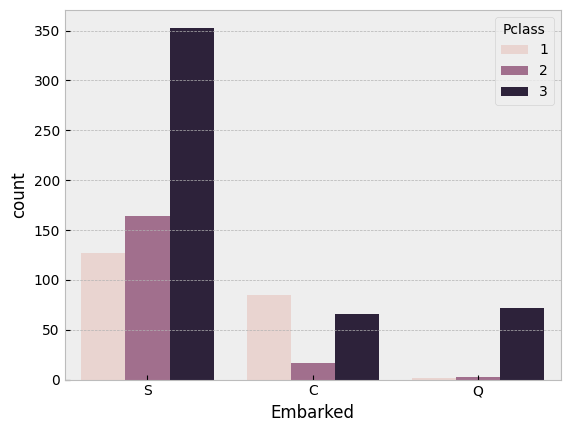

In [172]:
sns.countplot(data=df, x='Embarked', hue='Pclass')

- Most passengers embarked from port S. 
- In both ports S and Q, the majority of passengers had class = 3. However, Port Q had the highest ratio of class = 3
- Port C is th only port where we see a higher 1st class ratio

**Summary** The Southampton was the primary port for third-class passengers, while Cherbourg had a higher proportion of first-class passengers.

### Getting The Ratio of Survived for Each Port (Embarked)

In [173]:
df.groupby('Embarked')[['Survived']].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


- Port C survival ratio is the highest, where it has the highest ratio of 1st class passengers.
- port survival matches the 1st class ratio because most 3rd class passenges were in the ship's lower levels and couldn't get evacuated faster

### Inspect Our Common Knowledge About Titanic Survivors Demographics
Old people, children, and women were prioritized

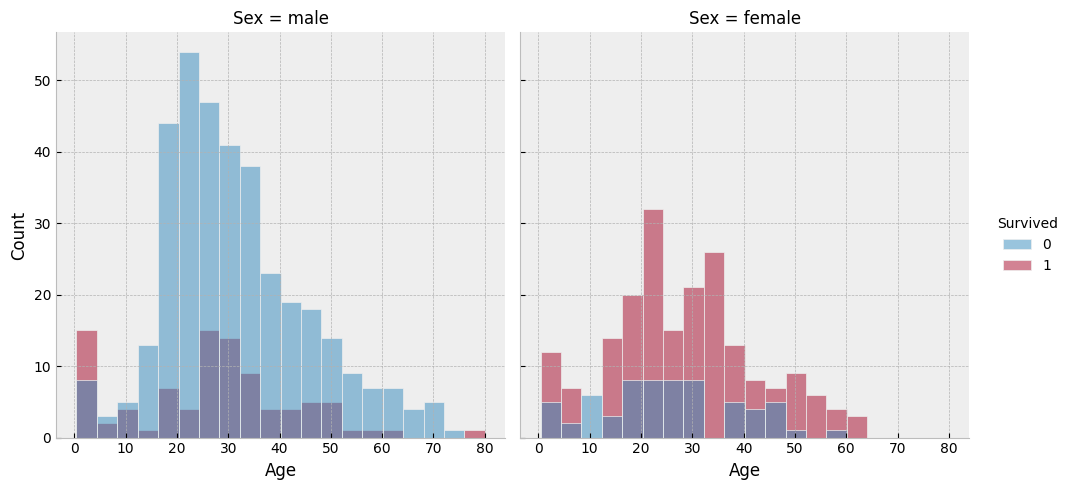

In [174]:
sns.displot(data=df, x='Age', col='Sex', hue='Survived')

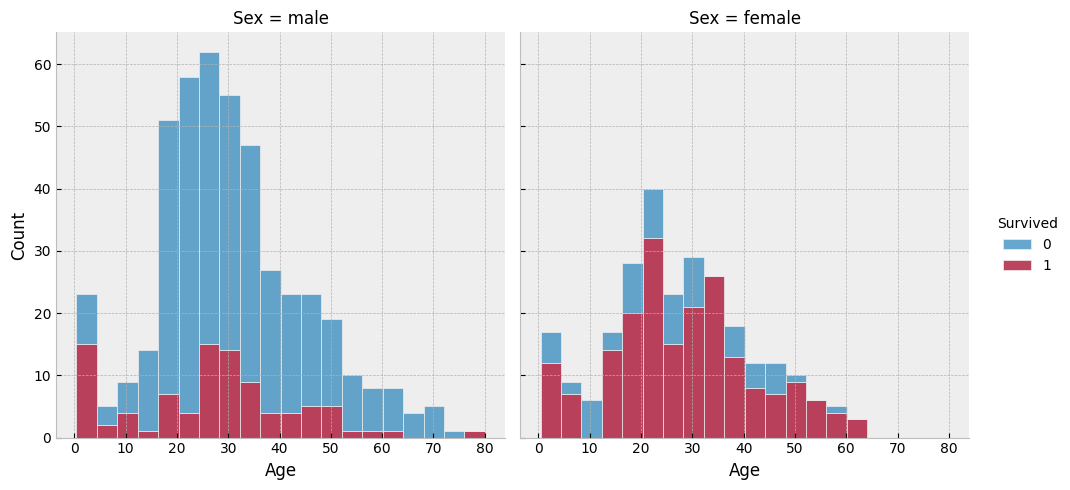

In [175]:
sns.displot(data=df, x='Age', col='Sex', hue='Survived', multiple='stack')

- Viz above proves our initial thoughts about the Titanic crisis:
    - Ratio of males who survived versus didn't survived is lower than female ratio
    - Even for male, we see a spike in lower age values (children) and higher (old people)
- In other words, Kids (ages 0–10) had a higher survival rate compared to adult males, which aligns with the prioritization of children during evacuation.
- The majority of the passengers were male

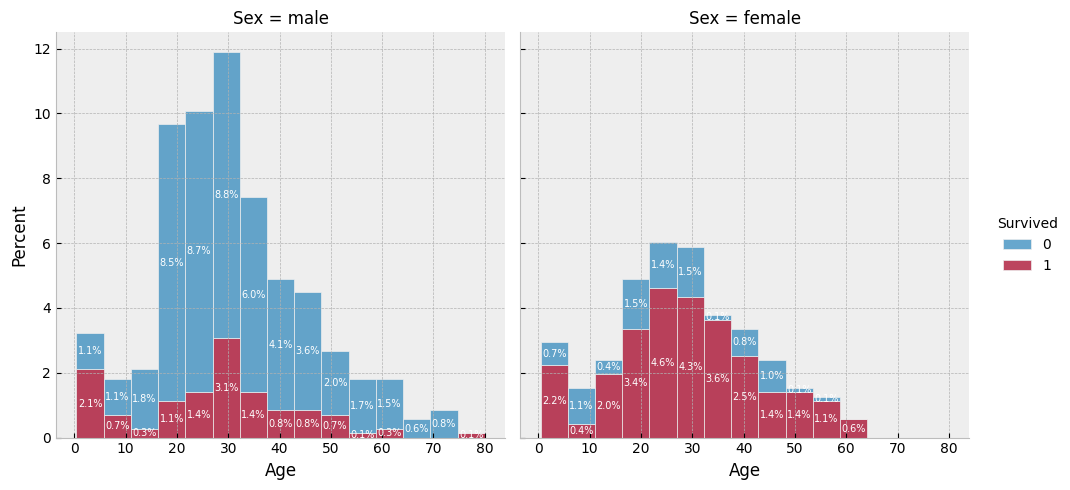

In [176]:
g = sns.displot(
    data=df,
    x='Age',
    col='Sex',
    hue='Survived',
    multiple="stack",
    kind="hist",
    bins=15,
    stat='percent'  # Show percentages instead of counts
)

def add_percent_labels(ax):
    for rect in ax.patches:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width()/2,
                    rect.get_y() + height/2,
                    f'{height:.1f}%',
                    ha='center', va='center',
                    fontsize=7, color='white')

for ax in g.axes.flat:
    add_percent_labels(ax)



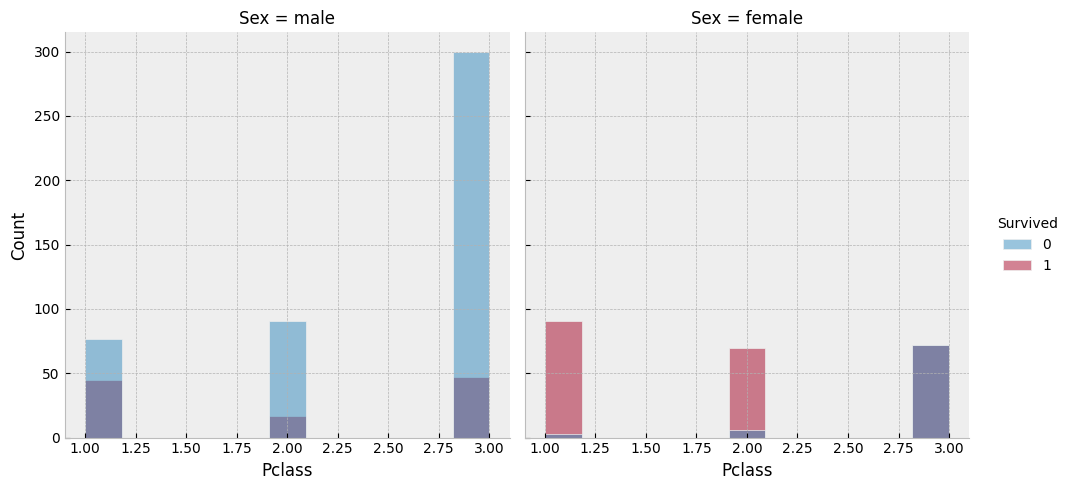

In [177]:
sns.displot(data=df, x='Pclass', col='Sex', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

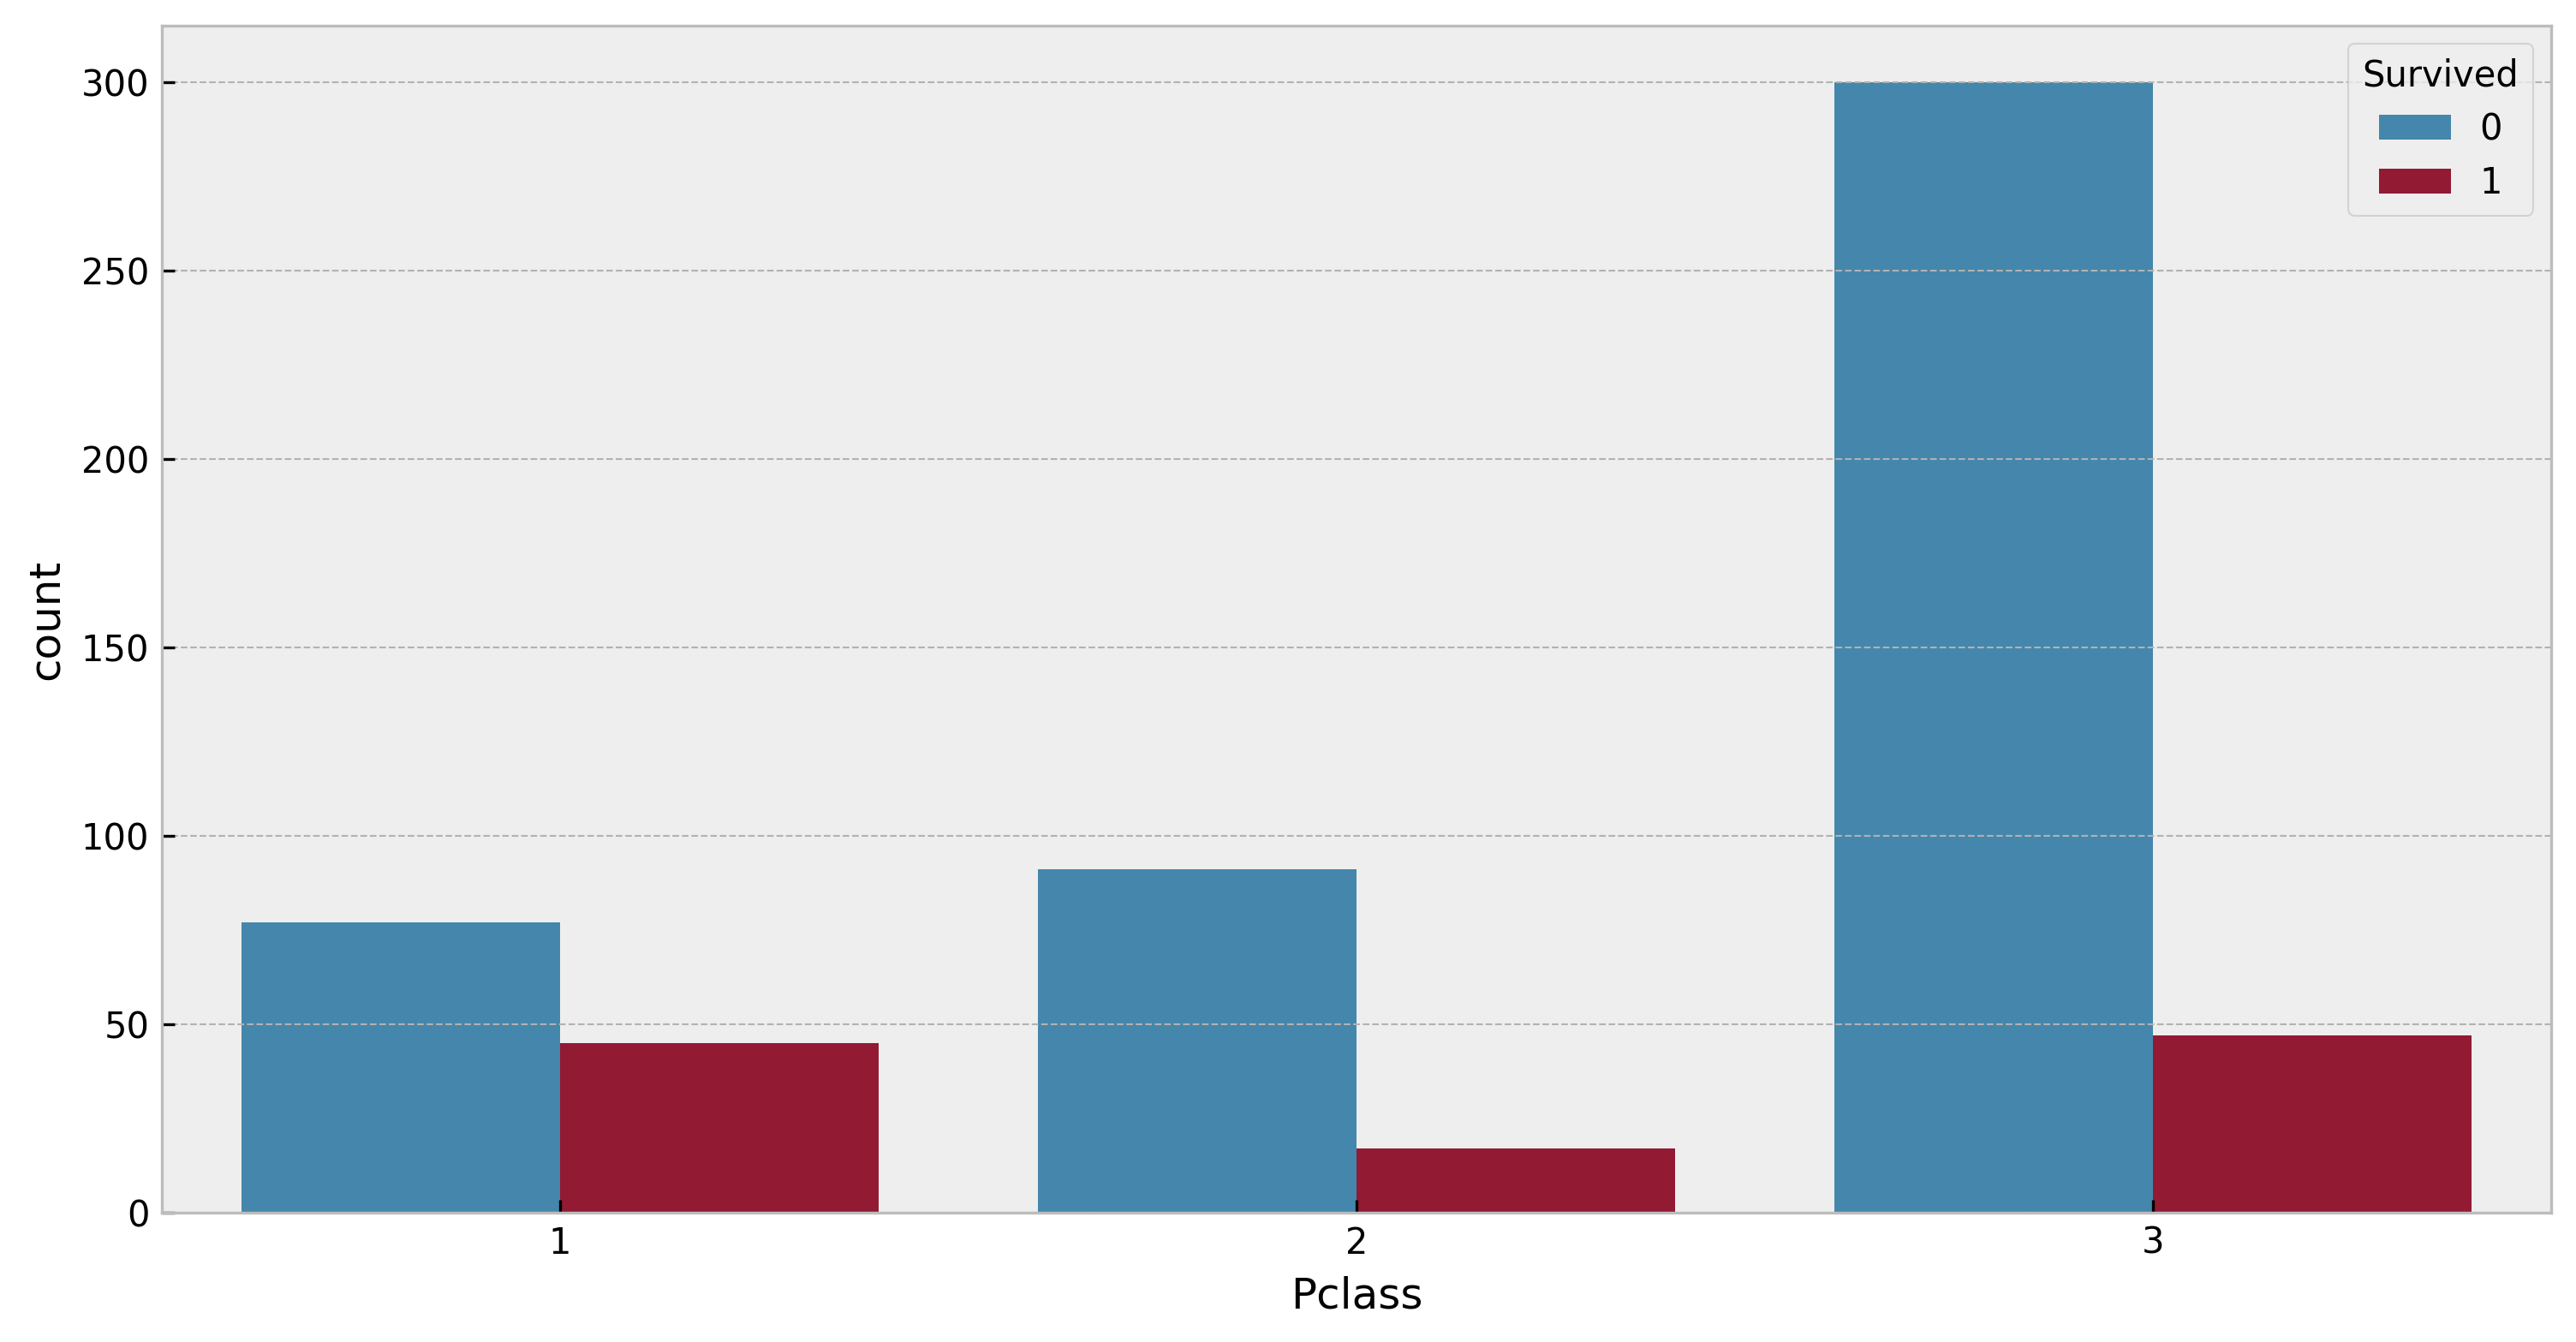

In [178]:
plt.figure(figsize=(12,6), dpi=300)
sns.countplot(data=df[df['Sex']=='male'], x='Pclass', hue='Survived')

- Class 3 has the highest ratio of no survival 
- Compared to other classes, 1st class has the highest ratio of men that survived

In [179]:
df.groupby('Sex')[['Survived']].agg(['mean', 'count'])

Survived      
            mean count
Sex                   
female  0.742038   314
male    0.188908   577

The ratio of survived females is higher than the one for survived males

In [180]:
df_without_children = df[df['Age']>12]
df_without_children.groupby('Sex')[['Survived']].agg(['mean', 'count'])

Survived      
            mean count
Sex                   
female  0.777293   229
male    0.173077   416

In [181]:
df['Child'] = (df['Age']<=12).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [182]:
df_only_children = df[df['Age']<=12]
df_only_children.groupby('Sex')[['Survived']].agg(['mean', 'count'])

Survived      
            mean count
Sex                   
female  0.593750    32
male    0.567568    37

In [183]:
df_only_children['Survived'].mean()

0.5797101449275363

In [184]:
# checking for the bar with females under 10 that did not survive
female_kids_non_survivors = df[(df['Age'] <= 10) & (df['Sex'] == 'female') & (df['Survived'] == 0)]
print(female_kids_non_survivors[['Name', 'Pclass', 'Ticket']])

                                     Name  Pclass      Ticket
24          Palsson, Miss. Torborg Danira       3      349909
119     Andersson, Miss. Ellis Anna Maria       3      347082
147      Ford, Miss. Robina Maggie "Ruby"       3  W./C. 6608
205            Strom, Miss. Telma Matilda       3      347054
297          Allison, Miss. Helen Loraine       1      113781
374            Palsson, Miss. Stina Viola       3      349909
419             Van Impe, Miss. Catharina       3      345773
541  Andersson, Miss. Ingeborg Constanzia       3      347082
634                    Skoog, Miss. Mabel       3      347088
642         Skoog, Miss. Margit Elizabeth       3      347088
813    Andersson, Miss. Ebba Iris Alfrida       3      347082
852               Boulos, Miss. Nourelain       3        2678


Let's check if passengers with 1st class tickets had a special treatment (more chances to survive)

<Axes: xlabel='Pclass', ylabel='count'>

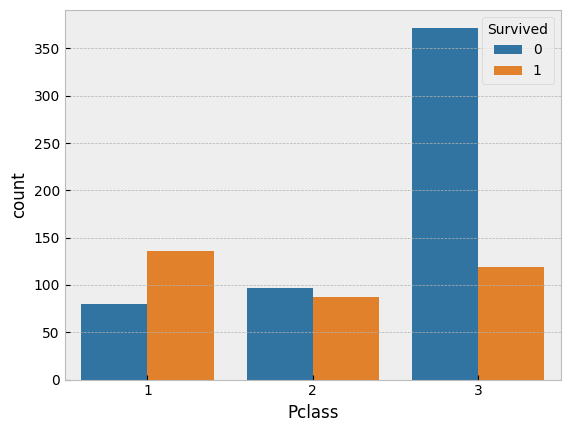

In [185]:
sns.countplot(data=df, x='Pclass', hue='Survived', palette='tab10')

- The passengers with 3rd class tickets had the lowest odds of survival.
- In other words, 1st class had a special treatment based on the data. And the ratio of survival was higher than no survival
- 2nd class may have had a special treatment too, but not as good as 1st class

In [186]:
df.sample(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C,0
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S,0
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S,1
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,1
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S,0
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,0
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S,1
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S,0
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S,0


## Preprocessing and Feature Engineering

- Stage 1:
    1. Imputation
    2. Feature Selection (dropping unnecessary columns)
    3. Encoding
    4. Feature extraction
        - Family size 
        - Alone indicator (T/F)
        - Child indicator 
        - Age bands
- Stage 2
    - Split the data into X and y
    - Split the data into train and test (X train, X test, y train, y test)
    - Scaling

there were a total of 2240 passengers/crew on the titanic.  the data set is 891 with survival status.  the ML will help us fill in the survival status of the 2240 passenger, based on variables we determine, cabin, sex, pclass, etc

In [187]:
#recommended
df_org = df.copy()

### Imputation

In [188]:
cols_with_nulls = df.columns[df.isna().sum()>0]
cols_with_nulls

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [189]:
for col in cols_with_nulls:
    print(f'{col}: {df[col].isna().sum()/len(df):.4f}')

Age: 0.1987
Cabin: 0.7710
Embarked: 0.0022


- We have Age, Embarked, and Cabin that have missing values
- Techniques:
    - **Cabin** Drop the column. We have a large ratio of missing values. We cannot rely on this colum at this point.
    - **Embarked** We can either _drop_ the rows or use _mode_ to impute. It's a categorical column.
    - **Age** We can use a sophisticated approach to impute by sub-groups

In [190]:
df.drop(columns='Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In the past, male children had "Master" title to their name. Let's inspect that, could be helpful for imputation.

In [191]:
mask = df['Name'].str.contains('Master')
df[mask].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Child
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S,1
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q,1
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,S,1
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,S,1
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,S,1
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C,0
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S,1
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,C,1
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S,0
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,S,1


In [192]:
df[mask]['Age'].describe()

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

with a max 12, the fact we stated earlier holds.

In [193]:
df[mask]['Age'].isna().sum()

4

Method above may not be effective. We need larger subgroups.

In [194]:
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Child,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,Mrs


In [195]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

Now we can impute based on the averages above

<Axes: xlabel='Age', ylabel='Count'>

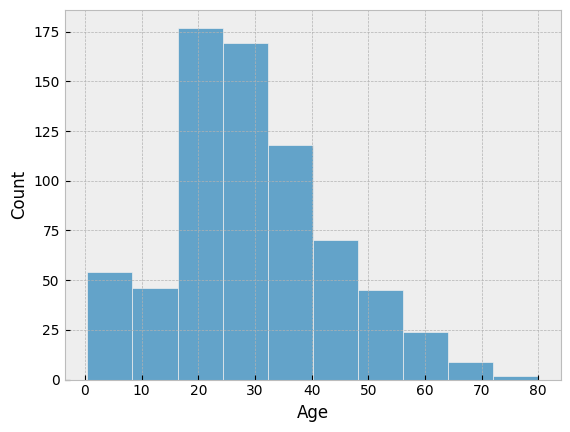

In [196]:
sns.histplot(df['Age'], bins=10)

In [197]:
# Step 2: Group rare titles into "Other"
title_counts = df['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index  # Titles appearing less than 10 times
df['Title'] = df['Title'].replace(rare_titles, 'Other')
#then impute using transofrm 

Or those rare titles may not have missing values. so check that first.

In [198]:
for val in df['Title'].unique():
    mask = df['Title']==val
    if df[mask]['Age'].isna().sum()>0:
        print(f"{val}: {df[mask]['Age'].isna().sum()} | Median Age: {df[mask]['Age'].median():.2f}")

Mr: 119 | Median Age: 30.00
Mrs: 17 | Median Age: 35.00
Miss: 36 | Median Age: 21.00
Master: 4 | Median Age: 3.50
Other: 1 | Median Age: 44.50


In [199]:
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'), inplace=True)
df['Age'].isna().sum()

0

> It's always recommended to check for the distribution after imputation to make sure it did not impact the skewness.

Text(0.5, 1.0, 'After Imputation')

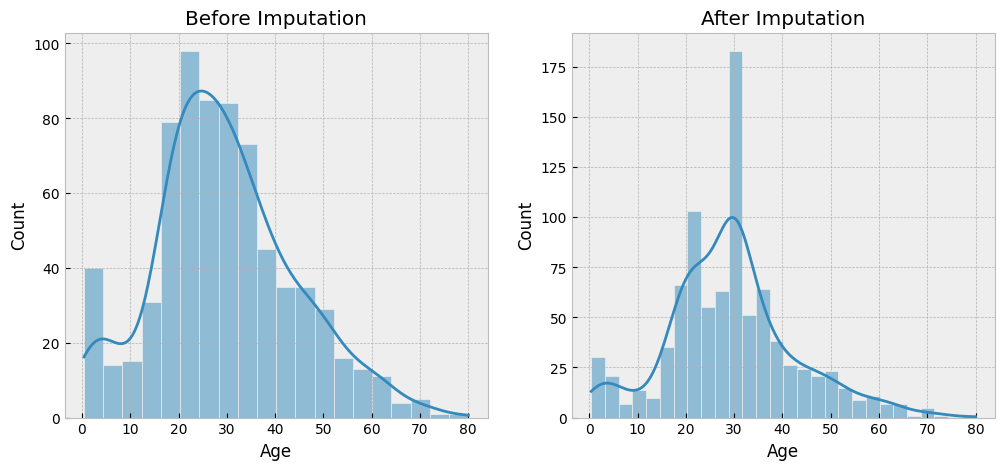

In [200]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
#before imputation
sns.histplot(df_org['Age'], ax=axes[0], kde=True)
axes[0].set_title('Before Imputation')

#after imputation
sns.histplot(df['Age'], ax=axes[1], kde=True)
axes[1].set_title('After Imputation')

- This change in the histogram shape is expected after imputation, especially if your imputation strategy filled in a lot of missing ages with a specific value
- Yes, this change in the histogram shape is expected after imputation, especially if your imputation strategy filled in a lot of missing ages with a specific value
- Consider other predictive strategies for imputation or dropping the data

In [201]:
#For Emabkred
df.dropna(inplace=True)
df_org.shape, df.shape

((891, 13), (889, 13))

### Feature Selection

In [202]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Child', 'Title'],
      dtype='object')

In [203]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Title
0,0,3,male,22.0,1,0,7.2500,S,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,0,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,1,1,female,35.0,1,0,53.1000,S,0,Mrs
4,0,3,male,35.0,0,0,8.0500,S,0,Mr


### Encoding
- 3 types of encoding to consider (recommendation)
    - OneHotEncoding:  when the data does not have ordinal characteristic and multi-categorical
    - OrdinalEncoding: when the data has ordinal characteristic
    - LabelEncoding: when the data does not have ordinal characteristic and binary (recommendation)
- Decision:
    - Sex -> Label
    - Embarked -> One Hot Encoding 
    - Title -> One Hot Encoding 

In [204]:
# label encoding
df['Sex'] = pd.factorize(df['Sex'])[0]

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Title
0,0,3,0,22.0,1,0,7.2500,S,0,Mr
1,1,1,1,38.0,1,0,71.2833,C,0,Mrs
2,1,3,1,26.0,0,0,7.9250,S,0,Miss
3,1,1,1,35.0,1,0,53.1000,S,0,Mrs
4,0,3,0,35.0,0,0,8.0500,S,0,Mr


In [205]:
#one hot encoding
df = pd.get_dummies(df, columns=['Embarked', 'Title'], dtype=int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,0,22.0,1,0,7.2500,0,0,0,1,0,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,0,1,0,0,0,0,0,1,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1,0,1,0,0,0
3,1,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,0,0,0,1,0,0,1,0,0


### Feature Extraction

In [206]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 19, 40, 60, 81], labels=[0,1,2,3,4])  # if you don't know the max, use np.inf

We're being efficient by "ordinarily" encoding the age bands 

In [207]:
df['AgeBin'].value_counts()

AgeBin
2    571
3    129
1     95
0     73
4     21
Name: count, dtype: int64

In [208]:
df['AgeBin'].unique()

[2, 3, 0, 1, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [209]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Child',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Other', 'AgeBin'],
      dtype='object')

Family Size = (Siblings + Spouse) + (Parents + Children) + 1

In [210]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,AgeBin,FamilySize
123,1,2,1,32.5,0,0,13.0000,0,0,0,1,0,1,0,0,0,2,1
510,1,3,0,29.0,0,0,7.7500,0,0,1,0,0,0,1,0,0,2,1
287,0,3,0,22.0,0,0,7.8958,0,0,0,1,0,0,1,0,0,2,1
36,1,3,0,30.0,0,0,7.2292,0,1,0,0,0,0,1,0,0,2,1
15,1,2,1,55.0,0,0,16.0000,0,0,0,1,0,0,0,1,0,3,1
381,1,3,1,1.0,0,2,15.7417,1,1,0,0,0,1,0,0,0,0,3
753,0,3,0,23.0,0,0,7.8958,0,0,0,1,0,0,1,0,0,2,1
617,0,3,1,26.0,1,0,16.1000,0,0,0,1,0,0,0,1,0,2,2
640,0,3,0,20.0,0,0,7.8542,0,0,0,1,0,0,1,0,0,2,1
817,0,2,0,31.0,1,1,37.0042,0,1,0,0,0,0,1,0,0,2,3


In [211]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,AgeBin,FamilySize,IsAlone
150,0,2,0,51.0,0,0,12.5250,0,0,0,1,0,0,0,0,1,3,1,1
192,1,3,1,19.0,1,0,7.8542,0,0,0,1,0,1,0,0,0,1,2,0
133,1,2,1,29.0,1,0,26.0000,0,0,0,1,0,0,0,1,0,2,2,0
400,1,3,0,39.0,0,0,7.9250,0,0,0,1,0,0,1,0,0,2,1,1
201,0,3,0,30.0,8,2,69.5500,0,0,0,1,0,0,1,0,0,2,11,0
179,0,3,0,36.0,0,0,0.0000,0,0,0,1,0,0,1,0,0,2,1,1
802,1,1,0,11.0,1,2,120.0000,1,0,0,1,1,0,0,0,0,0,4,0
703,0,3,0,25.0,0,0,7.7417,0,0,1,0,0,0,1,0,0,2,1,1
306,1,1,1,21.0,0,0,110.8833,0,1,0,0,0,1,0,0,0,2,1,1
615,1,2,1,24.0,1,2,65.0000,0,0,0,1,0,1,0,0,0,2,4,0


Now we can drop the old columns since they're redundant 

In [212]:
df.drop(columns=['SibSp', 'Parch'], inplace=True, axis=1)

## Stage 2

### Splitting The Data Into X and y

In [213]:
# features
X = df.drop(columns='Survived', axis=1) # method 2: df.iloc[:,1:]

#target
y = df['Survived'] # method 2: df.iloc[:,0]

In [214]:
X.head()

,Pclass,Sex,Age,Fare,Child,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,AgeBin,FamilySize,IsAlone
0,3,0,22.0,7.2500,0,0,0,1,0,0,1,0,0,2,2,0
1,1,1,38.0,71.2833,0,1,0,0,0,0,0,1,0,2,2,0
2,3,1,26.0,7.9250,0,0,0,1,0,1,0,0,0,2,1,1
3,1,1,35.0,53.1000,0,0,0,1,0,0,0,1,0,2,2,0
4,3,0,35.0,8.0500,0,0,0,1,0,0,1,0,0,2,1,1


### Splitting The Data Into Train and Test Subsets

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2, #80:20 ratio for train-test split
                                                    random_state=10 # data is split at random.
                                                    #However, random_state guarantees getting the same split every time
                                                    )

In [217]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 16), (178, 16), (711,), (178,))

In [218]:
len(df)*.8

711.2

### Scaling
> You should fit the scaler (mean, std, min, max, etc.) on the training set only, and then transform both the training and the test set using that scaler.


Here is a table that summarizes the key differences between MinMaxScaler and StandardScaler:

| Feature | MinMaxScaler | StandardScaler |
|---|---|---|
| Range | Scales the data to a fixed range, typically between 0 and 1 | Scales the data to have a mean of 0 and a standard deviation of 1 |
| Distribution | Not sensitive to the distribution of the data | Sensitive to the distribution of the data |
| Outliers | Sensitive to outliers | Not sensitive to outliers |
| Use cases | Good for datasets with a large range of values or neural networks| Good for datasets with a normal distribution or regression models|


In [219]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)  # Fit on training data only
X_test_scaled = mms.transform(X_test)        # Apply same scaling to test data

Why this matters:

1. Prevents data leakage: If you fit on the full dataset, information from the test set "leaks" into your preprocessing step. The scaler learns statistics (mean, std) from test data that it shouldn't have access to.
2. Simulates real-world deployment: In production, you'll only have training data to compute scaling parameters. New data should be scaled using the same parameters learned from training.
3. Maintains valid evaluation: Your test set should truly represent unseen data. If the scaler was fitted on test data, your model evaluation becomes overly optimistic.

## Model Building

- This is a **Supervised Learning** and **Binary Classification** problem. Therefore, we need to choose an appropriate ML algorithm for classification.
- We'll choose Logistic Regression, which is one of the simplest and most popular classification ML models.
- How Logistic Regression works:
    1. Linear combination of inputs: 
        - Basic linear equation: $y = m*x + c$ (m: slope and c: y-intercept)
        - With multiple (n) features: $y = w_1*x_1 + w_2*x_2 + ... w_n*x_n+ b$
            - y: target
            - x1,x2,x3,...xn: input features
            - w1,w2,w3: model's weight (learned through training)
            - b: bias (y-intercept)
    2. Apply the sigmoid function:
        - $\sigma(z) = 1/(1+e^{-z})$    
    3. Make a prediction with binary class:
        - $P >= 0.5$ -> classify as 1
        - $P < 0.5$ -> classify as 0
- Log Reg gives a binary outcome 0 or 1 (No or yes, True or False)
- It uses the Logistic Function (Sigmoid), which maps raw values into a value between 0 and 1
- By default, it uses a threshold of 0.5 or (50%)
    - Over than 0.5, then 1 (equals or greater)
    - Under 0.5, then 0

![LR](https://miro.medium.com/v2/resize:fit:1156/1*SN2tJJcL22ROb1fy0drj7Q.png)

### 1. Model Training

In [220]:
from sklearn.linear_model import LogisticRegression

# create the model object
lr_model = LogisticRegression() #each model has  a list of attributes called hyperparameters
#leaving the function blank means using the default parameter (check sklearn documentation)


In [221]:
# train model
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

Now that the model is defined and trained, we can use it to make predictions using our test data (X_test) and hide (y_test)

### 2. Model Prediction and Evaluation

In [222]:
# build the prediction dataset
y_test_pred = lr_model.predict(X_test_scaled) #sometimes it's called y_hat
y_test_pred[:20]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [223]:
y_test_pred.shape

(178,)

Model Evaluation

In [224]:
from sklearn.metrics import accuracy_score

In [225]:
lr_accuracy = accuracy_score(y_test, y_test_pred) #comparing the actual/original test target data to the predicted data
print(f'Logistic Regression Model Accuracy Score: {lr_accuracy:.2f}')

Logistic Regression Model Accuracy Score: 0.86


- Our model performed with 85% accuracy
- Considerations:
    - above 75% is ok/acceptable
    - above 80% is good
    - above 90% is very good
- In classification, accuracy is not the only measure to consider. It's recommended to use more metrics to get a comprehensive evaluation
- Things to consider to improve the model's performance:
    - Better feature extraction and engineering
    - Better data quality e.g. outlier treatment, change the standardization technique, etc...
    - Change the model's attributes (hyperparameters)
    - Improve the sample collection of the data
    - Experiment with other models
    - Cross-validation (splitting the data in different ways)

- To apply this model on a new dataset:
    - Make sure you have all columns match the training dataset (count, data type, etc...)
    - Make sure you apply the same feature engineering and preprocessing steps 

- The model is currently stored in this notebook's memory.
- To preserve the training and use it in different applications, you need to export the trained model.

## Exporting The Model After Training to Share Across Different Systems

`pip install joblib`

In [226]:
import joblib

In [227]:
# save the model
joblib.dump(lr_model, 'titanic_logistic_regression.pkl') #pickle file format

['titanic_logistic_regression.pkl']

In [228]:
# load the model 
loaded_model_LR = joblib.load('titanic_logistic_regression.pkl')

In [ ]:
#make prediction using the imported model
new_prediction = loaded_model_LR.predict(new_data)

> The data must have the same structure and feature engineering as the trained data in order for it to work.